Число событий:67
Макс длительность:60
Выбрано событий:67
    DecisionTreeRegressor:
Error train l =  0.0
Error test l =  0.5238095238095238
Error train r =  0.0
Error test r =  0.8571428571428571


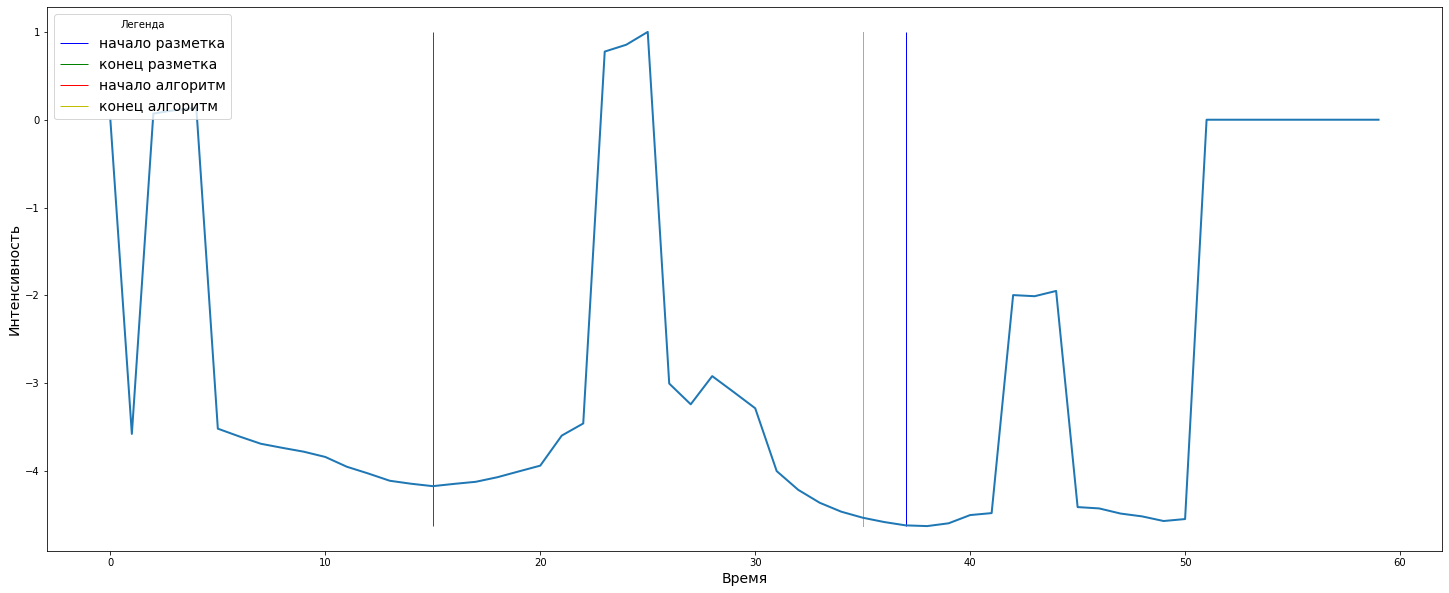

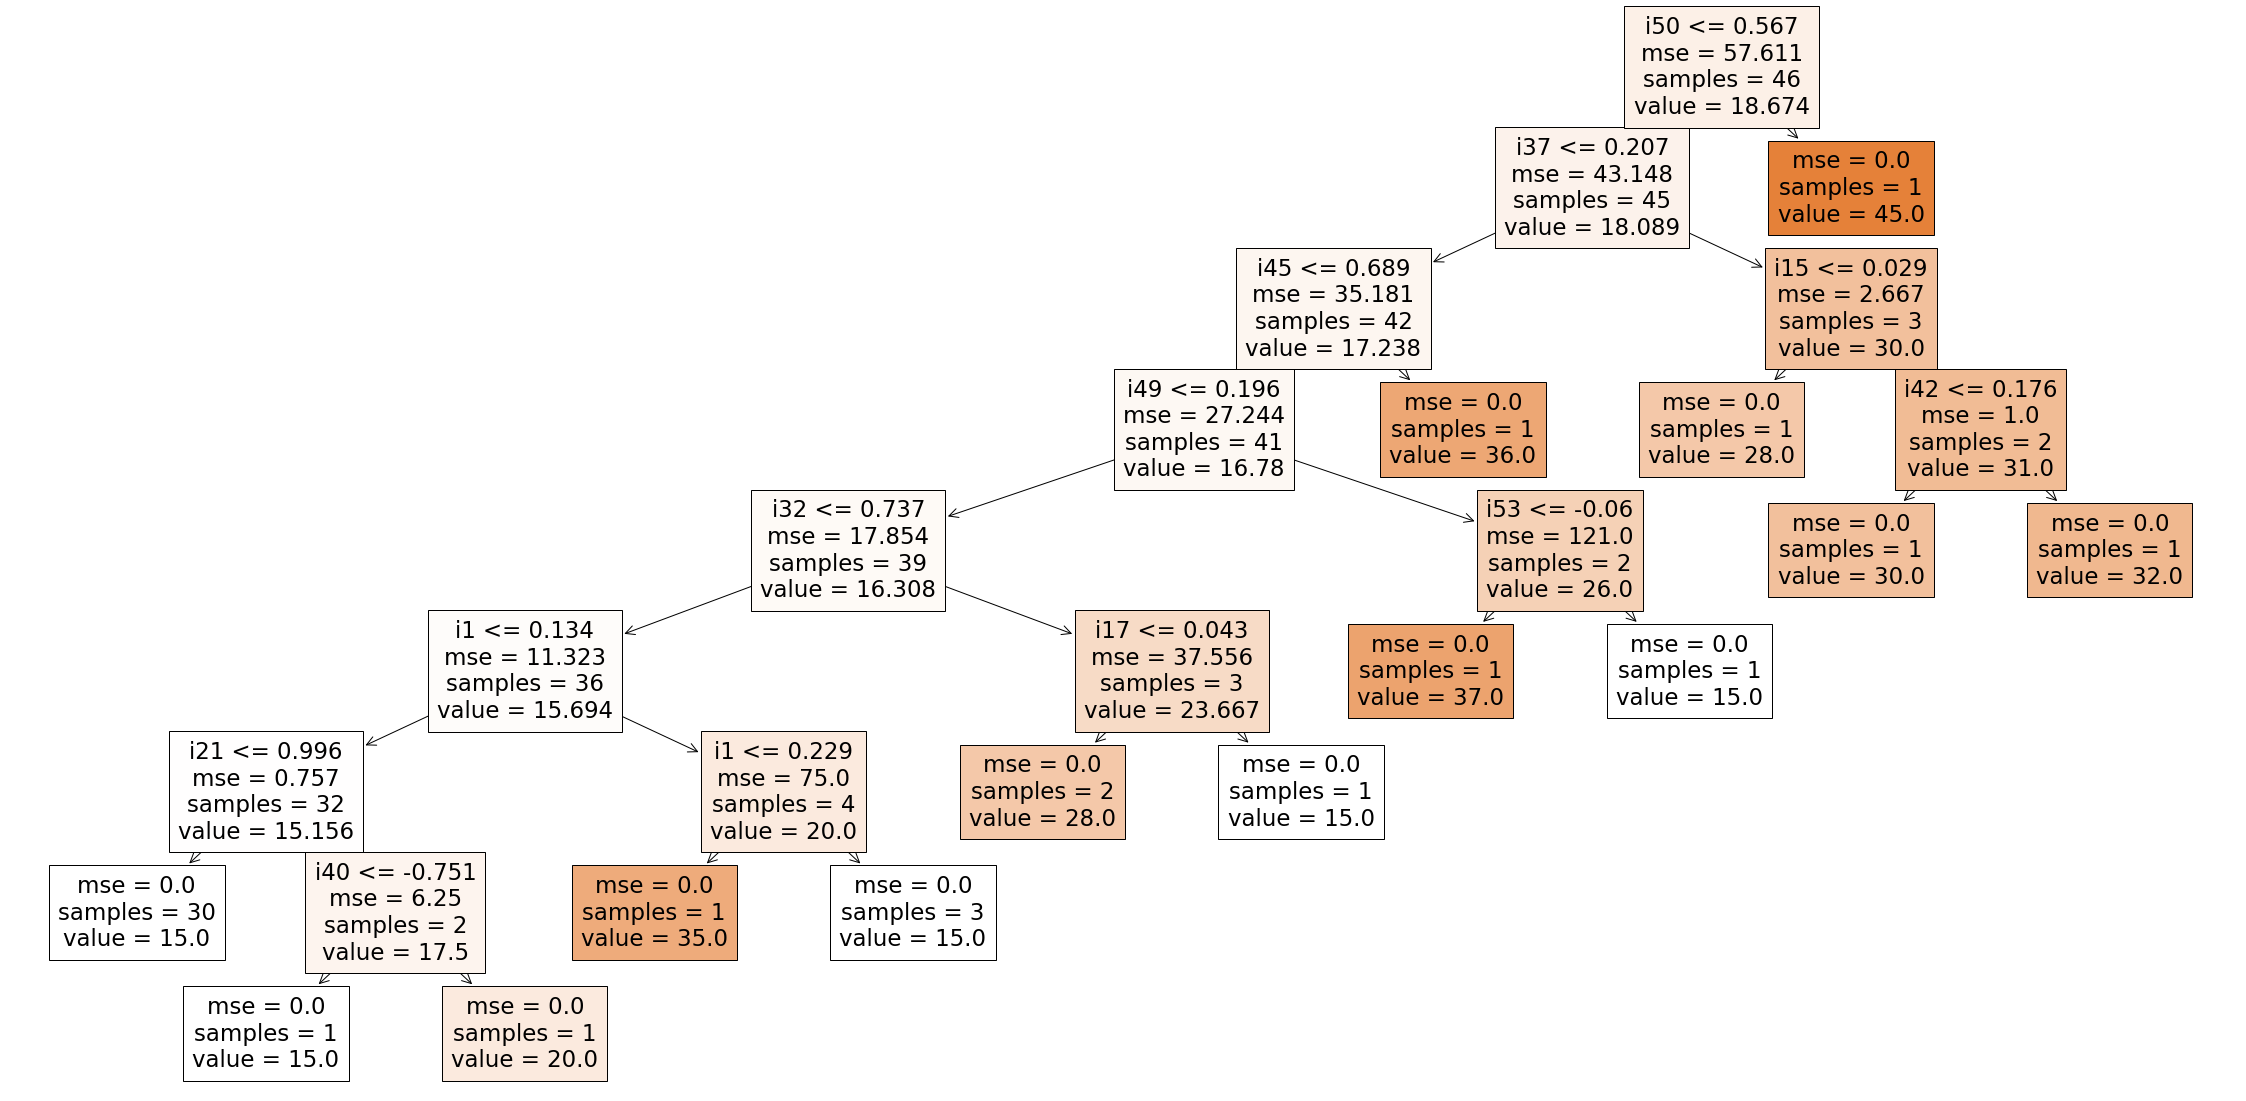

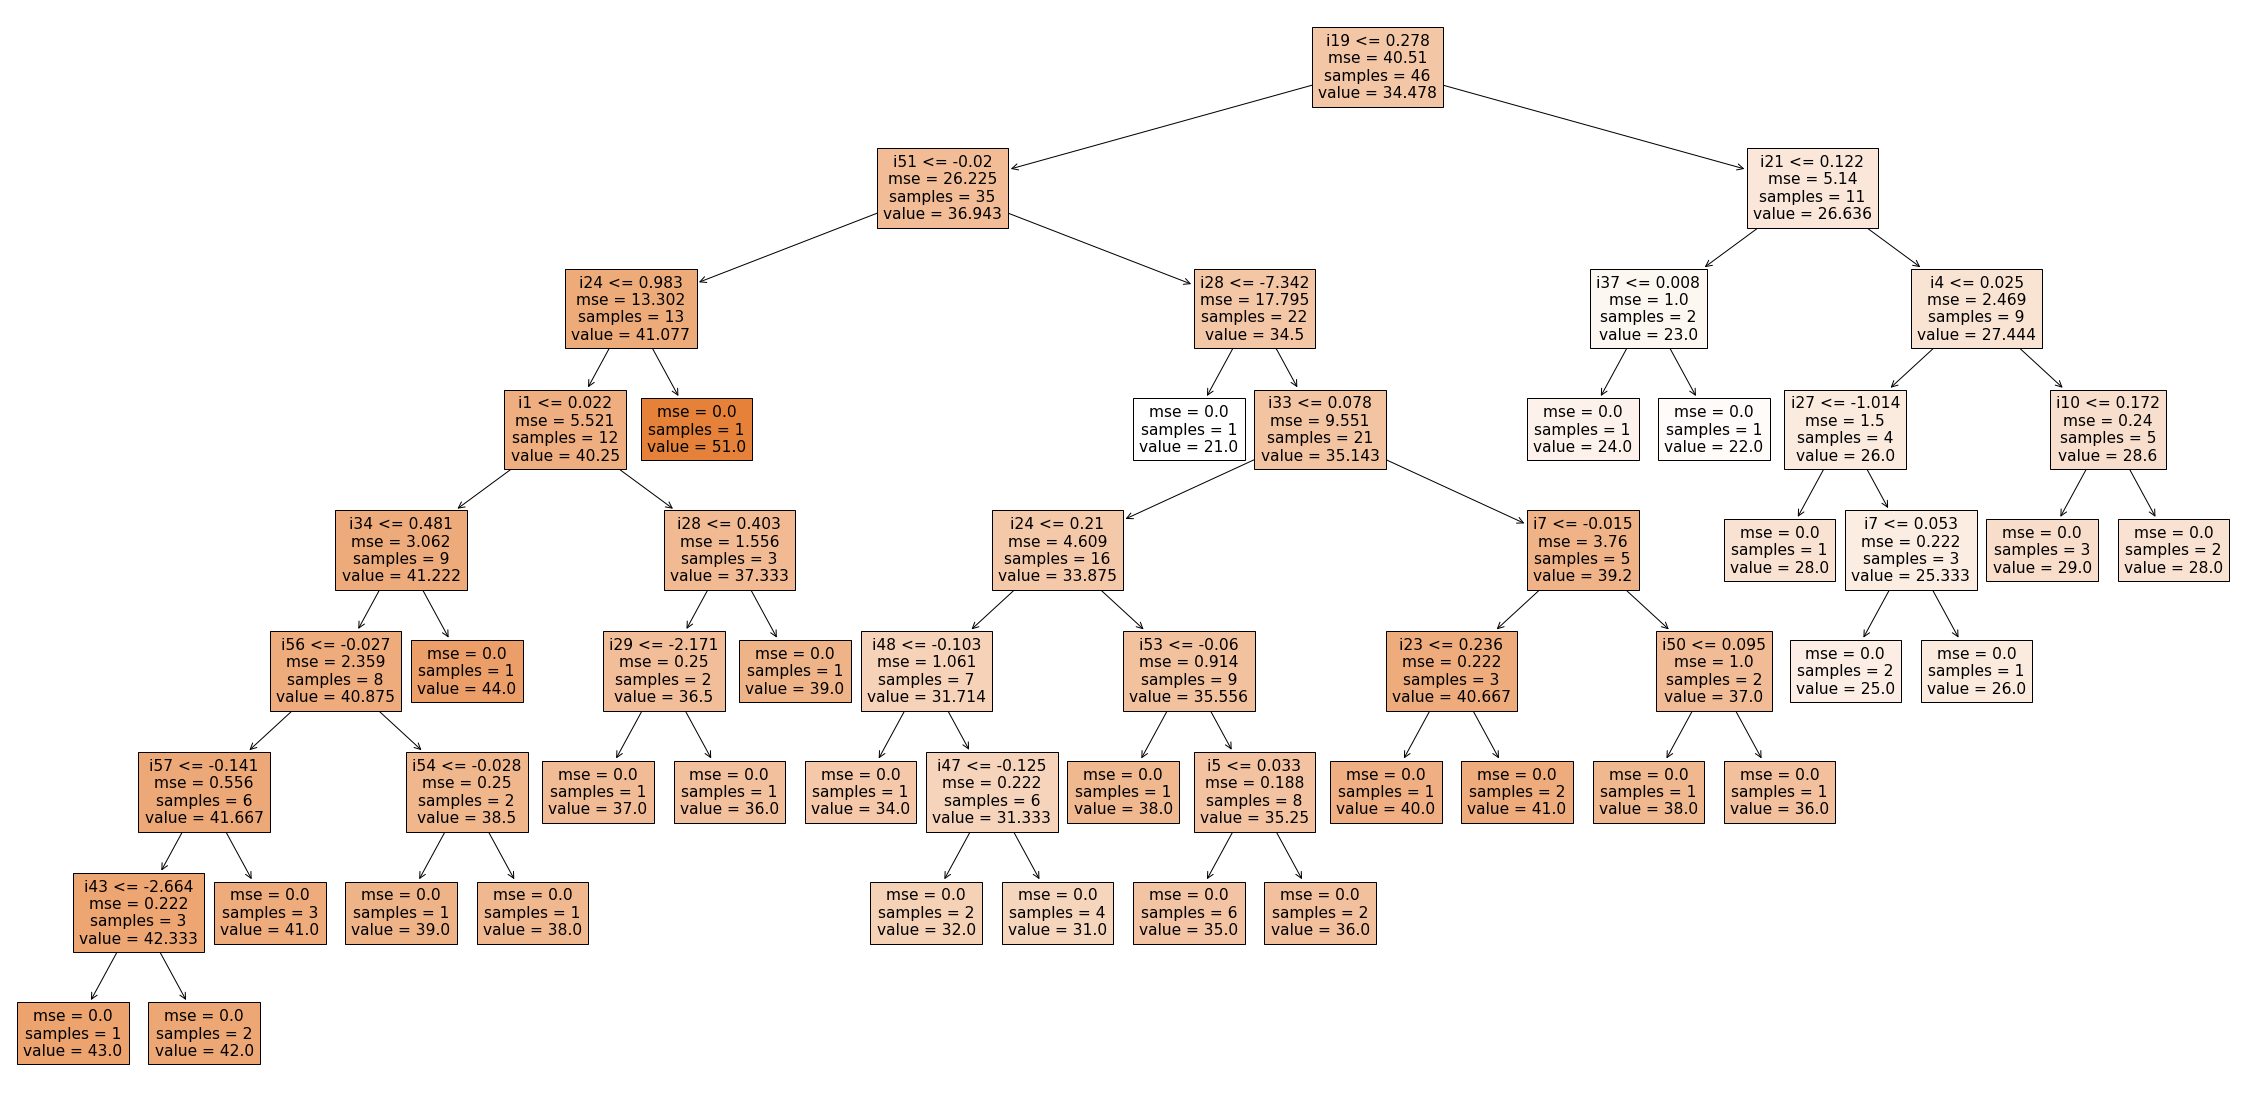

|--- feature_19 <= 0.28
|   |--- feature_51 <= -0.02
|   |   |--- feature_24 <= 0.98
|   |   |   |--- feature_1 <= 0.02
|   |   |   |   |--- feature_34 <= 0.48
|   |   |   |   |   |--- feature_56 <= -0.03
|   |   |   |   |   |   |--- feature_57 <= -0.14
|   |   |   |   |   |   |   |--- feature_43 <= -2.66
|   |   |   |   |   |   |   |   |--- value: [43.00]
|   |   |   |   |   |   |   |--- feature_43 >  -2.66
|   |   |   |   |   |   |   |   |--- value: [42.00]
|   |   |   |   |   |   |--- feature_57 >  -0.14
|   |   |   |   |   |   |   |--- value: [41.00]
|   |   |   |   |   |--- feature_56 >  -0.03
|   |   |   |   |   |   |--- feature_54 <= -0.03
|   |   |   |   |   |   |   |--- value: [39.00]
|   |   |   |   |   |   |--- feature_54 >  -0.03
|   |   |   |   |   |   |   |--- value: [38.00]
|   |   |   |   |--- feature_34 >  0.48
|   |   |   |   |   |--- value: [44.00]
|   |   |   |--- feature_1 >  0.02
|   |   |   |   |--- feature_28 <= 0.40
|   |   |   |   |   |--- feature_29 <= -2.17


In [84]:
# 2 вариант - результат разметки - число а не двоичный массив
from numpy import *
import pandas as pd
from pylab import *
import pywt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import os

def ListFiles(s):
    lp=[]
    ln=[]
    for file in os.listdir(s):    
        if file.endswith(".csv"):
            lp.append(s + file)
            ss=file.replace('.csv','')
            ln.append(ss)
    return lp, ln
    
def csv_to_lists(fn):
    Intensity = []
    Borders = []
    Type = []
    with open(fn, 'r') as f:
        header = f.readline()
        for line in f:
            s = line.replace(',','.') 
            if s.find(';') < 0:
                a = s
                b = '0'
                c = '0'
            else:    
                a, b, c = s.split(';')            
            Intensity.append(float(a))
            Borders.append(int(b))
            Type.append(int(c))
    return Intensity, Borders, Type


def LoadDir(s):
    lp, ln = ListFiles(s)
    Intencity = []
    Borders = []
    Type = []  
    for i in range(len(lp)):
        I, B, T = csv_to_lists(lp[i])
        if type(I)==list:
            Intencity = Intencity + I
            Borders = Borders + B
            Type = Type  + T
    return  Intencity, Borders, Type


def cut_events(Intencity, Borders, Typ, delta = 0):
    listevents = []
    lborbers = []
    for i in range(len(Intencity)):
        if Typ[i] == 4:
            levent = []
            lborder = []
            for j in range(i, 0, -1):
                if Borders[j] == 2:
                    break
            for m in range(i, len(Intencity)):
                if Borders[m] == 3:
                    break
            j = j - delta
            m = m + delta
            if j < 0:
                j = 0
            if m > len(Intencity) - 1:
                m = len(Intencity) - 1
            for k in range(j, m + 1):
                levent.append(Intencity[k])
                lborder.append(Borders[k])
            listevents.append(levent) 
            lborbers.append(lborder) 
    return listevents, lborbers

def MaxLen(l):
    mm = 0
    for i in range(len(l)):
        if len(l[i])>mm:
            mm = len(l[i])
    return mm

def prepare_borders(l):
    lb=-1
    rb=-1
    for i in range(len(l)):
        if l[i]==1:
            for j in range(i,-1,-1): 
                if l[j]==2:
                   lb=j
                   break
            for j in range(i,len(l)): 
                if l[j]==3:
                   rb=j
                   break
              
    return lb, rb

def calc_borders_dtr(Intensity):
    borders = []
    
    dtr_l = DecisionTreeRegressor()
    dtr_l.fit(X_trainl, y_trainl)
    dtr_r = DecisionTreeRegressor()
    dtr_r.fit(X_trainr, y_trainr)

    X_test = X_testl[e].reshape(1, -1)
    yrezl = dtr_l.predict(X_test)
    yrezr = dtr_r.predict(X_test)

    b = [1,5]
    borders.append(b)
    return borders 

# c одного файла
#Intencity, Borders, Type = CsvToLists('labels195.csv')  
#10 событий - красиво
#Intencity, Borders, Type = CsvToLists('labels27.csv') 
#движение клетки из биошума
#Intencity, Borders, Type = CsvToLists('18bns.csv') 

Intencity, Borders, Type = LoadDir('C:/Users/1/Desktop/TruEventNew/data/!hyp/3/2/')

event, bord = cut_events(Intencity, Borders, Type, 15)
maxlenevent = MaxLen(event)

print('Число событий:' + str(len(event)))
print('Макс длительность:' + str(maxlenevent))


X = np.zeros((len(event),maxlenevent))
#y = np.zeros((len(event),2))
yl = np.zeros((len(event)))
yr = np.zeros((len(event)))
x = []
#yl = []
#yr = []
k=0

for i in range(len(event)):
    #xx = np.asarray(event[i])
    #xx = (xx - xx.mean) / (xx.std)
    #X[i][:len(event[i])] = xx
    lb, rb = prepare_borders(bord[i])
    b = event[i][0]
    for j in range(len(event[i])):
        event[i][j]=event[i][j]-b
    mm=float(max(event[i]))    
    if mm!=0:
        for j in range(len(event[i])):
            f=float(event[i][j])
            f=f/mm
            event[i][j]=f
    
    if lb !=-1 or rb != -1:
        #yl.append(lb)
        #yr.append(rb)
        #x.append(event[i])
        X[k][:len(event[i])] = np.asarray(event[i])
        yl[k] = lb
        yr[k] = rb
        k=k+1

print('Выбрано событий:' + str(len(yl)))



X_trainl, X_testl, y_trainl, y_testl = train_test_split(X, yl, train_size=0.7, random_state=777)
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X, yr, train_size=0.7, random_state=777)

dtr_l = DecisionTreeRegressor()
dtr_l.fit(X_trainl, y_trainl)
dtr_r = DecisionTreeRegressor()
dtr_r.fit(X_trainr, y_trainr)


#print(ytest)
fig2, ax = plt.subplots(figsize = (25,10))
plt.ylabel('Интенсивность', fontsize = 14)
plt.xlabel('Время', fontsize = 14)

e = 13
X_test = X_testl[e].reshape(1, -1)
yrezl = dtr_l.predict(X_test)
yrezr = dtr_r.predict(X_test)
plt.plot(X_testl[e], linewidth=2)
plt.vlines(y_testl[e], min(X_testl[e]), max(X_testl[e]), color = 'b', linewidth = 1, label = 'начало разметка')
plt.vlines(y_testr[e], min(X_testr[e]), max(X_testr[e]), color = 'g', linewidth = 1, label = 'конец разметка')
plt.vlines(yrezl, min(X_testl[e]), max(X_testl[e]), color = 'r', linewidth = 1, label = 'начало алгоритм')
plt.vlines(yrezr, min(X_testr[e]), max(X_testr[e]), color = 'y', linewidth = 1, label = 'конец алгоритм')
ax.legend(loc="upper left", title = "Легенда", fontsize = 14)

#plt.plot(ytestl[2], linewidth=2)

print("    DecisionTreeRegressor:")
print('Error train l = ', np.mean(y_trainl != dtr_l.predict(X_trainl))) 
print('Error test l = ', np.mean(y_testl != dtr_l.predict(X_testl)))
print('Error train r = ', np.mean(y_trainr != dtr_r.predict(X_trainr))) 
print('Error test r = ', np.mean(y_testr != dtr_r.predict(X_testr)))


lti=[]
for i in range(maxlenevent): 
    lti.append('i' + str(i))

plt.figure(figsize=(40, 20))
tree.plot_tree(dtr_l, feature_names=lti, filled=True) 
plt.show()
plt.figure(figsize=(40, 20))
tree.plot_tree(dtr_r, feature_names=lti, filled=True) 
plt.show()

text_representation = tree.export_text(dtr_r)
print(text_representation)


